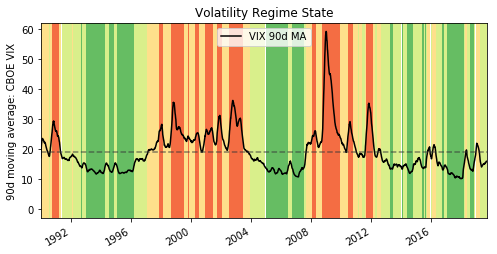

In [5]:
import pandas as pd
import matplotlib.transforms as mtransforms
import numpy as np
from matplotlib import pyplot as plt

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'

vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                   infer_datetime_format=True,
                   squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
                labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
         label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')

In [7]:
state

DATE
1990-01-02    1
1990-01-03    1
1990-01-04    2
1990-01-05    2
1990-01-08    2
1990-01-09    2
1990-01-10    2
1990-01-11    2
1990-01-12    2
1990-01-15    2
1990-01-16    2
1990-01-17    2
1990-01-18    2
1990-01-19    2
1990-01-22    2
1990-01-23    2
1990-01-24    2
1990-01-25    2
1990-01-26    2
1990-01-29    2
1990-01-30    2
1990-01-31    2
1990-02-01    2
1990-02-02    2
1990-02-05    2
1990-02-06    2
1990-02-07    2
1990-02-08    2
1990-02-09    2
1990-02-12    2
             ..
2019-08-08    1
2019-08-09    1
2019-08-12    1
2019-08-13    1
2019-08-14    1
2019-08-15    1
2019-08-16    1
2019-08-19    1
2019-08-20    1
2019-08-21    1
2019-08-22    1
2019-08-23    1
2019-08-26    1
2019-08-27    1
2019-08-28    1
2019-08-29    1
2019-08-30    1
2019-09-03    1
2019-09-04    1
2019-09-05    1
2019-09-06    1
2019-09-09    1
2019-09-10    1
2019-09-11    1
2019-09-12    1
2019-09-13    1
2019-09-16    1
2019-09-17    1
2019-09-18    1
2019-09-19    1
Name: VIXCLS, Lengt